# NOI: Random Signals #

This notebook demonstrates different random processes and their properties (unfiltered and filtered).
- Uniform distribution
- Gaussian distribution


In [2]:
from __future__ import print_function, division
import os, sys
import time

module_path = os.path.abspath(os.path.join('..')) # append directory one level up to import path
if module_path not in sys.path:  # ... if it hasn't been appended already
    sys.path.append(module_path)

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
#%matplotlib notebook
%matplotlib inline

import dsp_fpga_lib as dsp # import and set plot properties
import dsp_fpga_fix_lib as fx

import numpy as np
from numpy import sin, cos, tan, angle, pi, array, arange, log10, zeros, \
  linspace, ones, sqrt
from scipy.stats import norm
import scipy.signal as sig

plt.rcParams["figure.figsize"] = [15, 10]

## Random sequences ##
In Python, we can easily generate random sequences with different properties. Sequences with a **Gaussian** distribution of values are probably best known, but **Uniform** or **Binomial** distributions are also very common.

In [3]:
N = 10000       # number of data points
N_bins = 50     # number of bins for histograms
n = arange(N)   # array 0 ... N
t = n / N       # arr ay 0 ... 1
db_bottom = -60 # display minimum for plotting in dB
f_S = 10000       # sampling frequency; bandwidth is f_S / 2 by default
# Gaussian distribution with variance sigma and mean mu:
sigma = 2; mu_n = 0 
x_norm = np.random.randn(N) * sigma + mu_n
x_norm_filt = sig.lfilter(np.ones(50)/50, 1, x_norm)
x_sigma = np.arange(-3 * sigma, 3 * sigma, 0.001)
y_sigma = norm.pdf(x_sigma, mu_n, sigma)# Ideal Gaussian bell curve
# Uniform distribution in the range 0 ... Delta with mean mu:
Delta = 1; mu_u = -Delta/2. # range and mean
x_uniform = np.random.rand(N) * Delta + mu_u
# Binomial distribution for n_T trials and a success probability p for each trial:
n_T = 1; p = 0.5
x_binom = np.random.binomial(n_T, p, N)

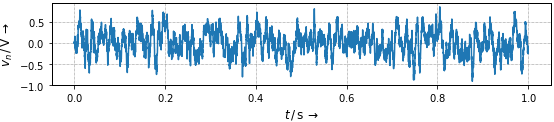

In [4]:
# Make a nice plot of a random signal - select the type in the next line:
x_rnd = x_norm_filt
fig1 = plt.figure(1, figsize=(8,2))
ax1 = fig1.add_subplot(111)
ax1.plot(t, x_rnd, label = r'$\sigma = {0}, m = 0$'.format(sigma))
ax1.set_xlabel(r'$t \,/ \, \mathrm{s}\, \rightarrow$')
ax1.set_ylabel(r'$v_n \,/ \,\mathrm{V} \,\rightarrow$');
fig1.tight_layout()
# fig1.savefig("random.svg", transparent=True, pad_inches=0) # optional, save to file
plt.show()

Zunächst schauen wir uns zwei verschiedene Verteilungsdichtefunktionen an, normal- oder gaussverteilte Folgen und gleichverteilte Folgen.

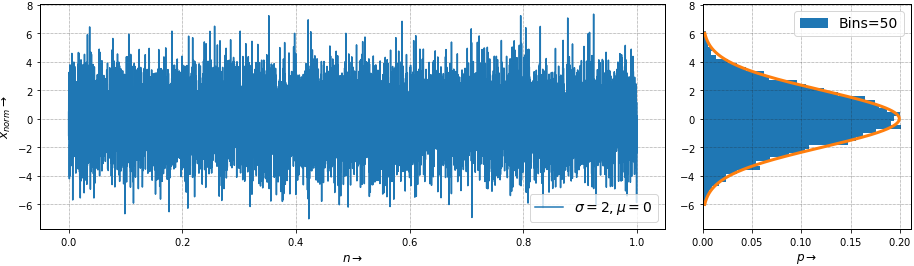

In [5]:
# Generate nice plots for slides of process and pdf:
#---------------------------------------------------
rnd_type = "Normal" # "Uniform", "Normal", "Binomial"
fig2 = plt.figure(2, figsize=(13,4))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 
ax2a = plt.subplot(gs[0])
#ax2a.set_title(rnd_type + ' Distribution')
if rnd_type=='Normal':
    ax2a.plot(t, x_norm, label = r'$\sigma = {0}, \mu = {1}$'.format(sigma, mu_n))
    ax2a.set_ylabel(r'$x_{norm}\rightarrow$')
    x_rnd = x_norm
elif rnd_type=='Uniform':
    ax2a.plot(t, x_uniform, label = r'$\Delta = {0}, \mu = {1}$'.format(Delta, mu_u))
    ax2a.set_ylabel(r'$x_{uniform}\rightarrow$')
    x_rnd = x_uniform
elif rnd_type=='Binomial':
    ax2a.plot(t, x_binom, label = r'$p = {0}, n_T = {1}$'.format(p, n_T))
    ax2a.set_ylabel(r'$x_{binom}\rightarrow$')
    x_rnd = x_binom
ax2a.legend(fontsize = 14)
ax2a.set_xlabel(r'$n \rightarrow$');
ax2b= plt.subplot(gs[1])
ax2b.hist(x_rnd, bins=N_bins, range=None, density=True, align=u'mid', orientation=u'horizontal', label='Bins={0}'.format(N_bins))
if rnd_type=='Normal':
    ax2b.plot(y_sigma, x_sigma, lw=3)
elif rnd_type=='Uniform':
    ax2b.plot([0, 1/Delta, 1/Delta, 0],[mu_u, mu_u, Delta+mu_u,Delta+mu_u], lw=3)
ax2b.legend(fontsize = 14)
ax2b.set_xlabel(r'$p \rightarrow$')
ax2b.set_ylim(ax2a.get_ylim())
fig2.tight_layout();
#fig2.savefig(rnd_type + ".svg")

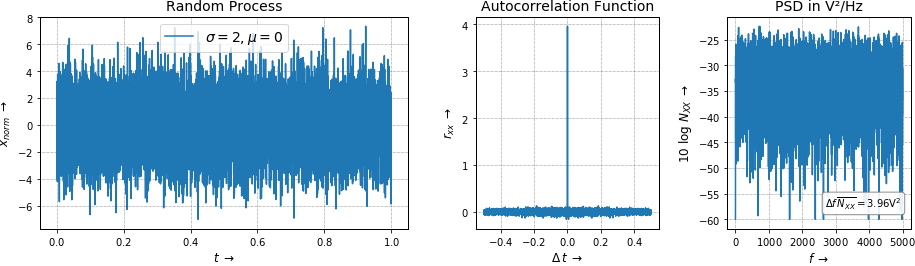

In [6]:
# Generate nice plots for slides of process, acf and psd:
#---------------------------------------------------------
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9) # properties for annotation box
rnd_type = "Normal" # "Uniform", "Normal", "Binomial"
fig2 = plt.figure(2, figsize=(13,4))
gs = gridspec.GridSpec(1, 3, width_ratios=[2, 1, 1]) 
ax2a = plt.subplot(gs[0])
ax2a.set_title('Random Process')
if rnd_type=='Normal':
    ax2a.plot(t, x_norm, label = r'$\sigma = {0}, \mu = {1}$'.format(sigma, mu_n))
    ax2a.set_ylabel(r'$x_{norm}\; \rightarrow$')
    x_rnd = x_norm
elif rnd_type=='Uniform':
    ax2a.plot(n, x_uniform, label = r'$\Delta = {0}, \mu = {1}$'.format(Delta, mu_u))
    ax2a.set_ylabel(r'$x_{uniform}\; \rightarrow$')
    x_rnd = x_uniform
elif rnd_type=='Binomial':
    ax2a.plot(x_binom, label = r'$p = {0}, n_T = {1}$'.format(p, n_T))
    ax2a.set_ylabel(r'$x_{binom} \;\rightarrow$')
    x_rnd = x_binom
ax2a.legend(fontsize = 14)
ax2a.set_xlabel(r'$t \; \rightarrow$');
ax2b= plt.subplot(gs[1])
ax2b.set_title('Autocorrelation Function')
acf = sig.correlate(x_rnd, x_rnd, mode='same')/N
ax2b.plot(t - 0.5, acf)
ax2b.set_xlabel(r'$\Delta \, t \; \rightarrow$')
ax2b.set_ylabel(r'$r_{xx} \; \rightarrow$')
ax2b = plt.subplot(gs[2])
ax2b.set_title('PSD in V²/Hz')
f, Nxx = sig.periodogram(x_rnd, f_S)
ax2b.plot(f, np.clip(10*log10(Nxx), db_bottom, np.inf))

ax2b.annotate(r'$\Delta f\, \overline{{N_{{XX}}}} ={0:.3g}\mathrm{{V}}^2$'.format(np.mean(Nxx)*f_S/2), xy=(0.95, 0.1), 
              xycoords='axes fraction', ha='right', bbox=bbox_props)
ax2b.set_xlabel(r'$f \; \rightarrow$')
ax2b.set_ylabel(r'10 log $N_{XX}\; \rightarrow$')
fig2.tight_layout();
#fig2.savefig(rnd_type + "_acf.svg")

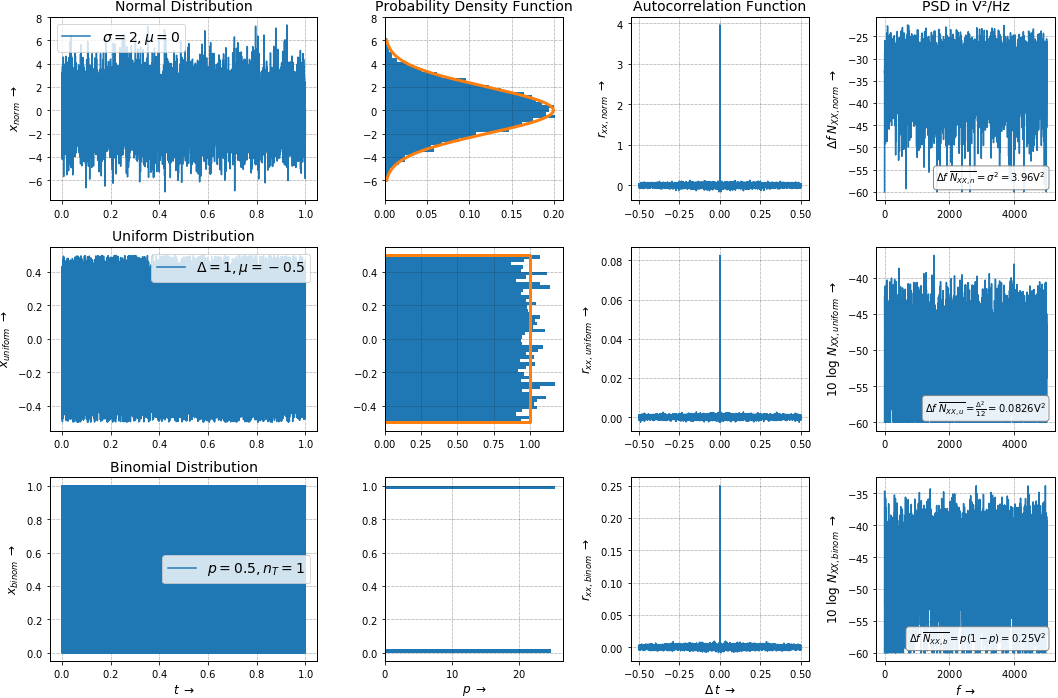

In [7]:
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9) # properties for annotation box
fig3 = plt.figure(3, figsize=(15,10))
gs = gridspec.GridSpec(3, 4, width_ratios=[1.5, 1, 1, 1])
ax31a = plt.subplot(gs[0])
ax31a.set_title('Normal Distribution')
ax31a.plot(t, x_norm, label = r'$\sigma = {0}, \mu = {1}$'.format(sigma, mu_n))
ax31a.legend(fontsize = 14)
ax31a.set_ylabel(r'$x_{norm}\; \rightarrow$')
ax31b = plt.subplot(gs[1])
ax31b.set_title('Probability Density Function')
ax31b.hist(x_norm, bins=N_bins, range=None, density=True, 
          align=u'mid', orientation=u'horizontal', label=None)
ax31b.plot(y_sigma, x_sigma, lw=3)
ax31b.set_ylim(ax31a.get_ylim())
ax31c = plt.subplot(gs[2])
ax31c.set_title('Autocorrelation Function')
acf = sig.correlate(x_norm, x_norm, mode='same')/N
ax31c.plot(t - 0.5, acf)
ax31c.set_ylabel(r'$r_{xx,norm} \; \rightarrow$')
ax31d = plt.subplot(gs[3])
ax31d.set_title('PSD in V²/Hz')
f, Nxx_n = sig.periodogram(x_norm, f_S)
ax31d.plot(f, np.clip(10*log10(Nxx_n), db_bottom, np.inf))
ax31d.annotate(r'$\Delta f \; \overline{{N_{{XX,n}}}}=\sigma^2={0:.3g}\mathrm{{V}}^2$'.format(np.mean(Nxx_n)*f_S/2), xy=(0.95, 0.1), 
              xycoords='axes fraction', ha='right',bbox=bbox_props)
ax31d.set_ylabel(r'$\Delta f\; N_{XX, norm}\; \rightarrow$')

ax32a = plt.subplot(gs[4])
ax32a.set_title('Uniform Distribution')
ax32a.plot(t, x_uniform, label = r'$\Delta = {0}, \mu = {1}$'.format(Delta, mu_u))
ax32a.legend(fontsize = 14)
ax32a.set_ylabel(r'$x_{uniform} \; \rightarrow$')
ax32b = plt.subplot(gs[5])
ax32b.hist(x_uniform, bins=N_bins, range=None, density=True, 
          align=u'mid', orientation=u'horizontal', label=None)
ax32b.plot([0, 1/Delta, 1/Delta, 0],[mu_u, mu_u, Delta+mu_u,Delta+mu_u], lw=3)
ax32b.set_ylim(ax32a.get_ylim())
ax32c = plt.subplot(gs[6])
acf = sig.correlate(x_uniform, x_uniform, mode='same')/N
ax32c.plot(t - 0.5, acf)
ax32c.set_ylabel(r'$r_{xx,uniform} \; \rightarrow$')
ax32d = plt.subplot(gs[7])
f, Nxx_u = sig.periodogram(x_uniform, f_S)
ax32d.plot(f, np.clip(10*log10(Nxx_u), db_bottom, np.inf))
ax32d.annotate(r'$\Delta f\; \overline{{N_{{XX,u}}}}=\frac{{\Delta^2}}{{12}}={0:.3g}\mathrm{{V}}^2$'.
              format(np.mean(Nxx_u)*f_S/2), xy=(0.95, 0.1), xycoords='axes fraction', ha='right',bbox=bbox_props)
ax32d.set_ylabel(r'10 log $N_{XX, uniform} \; \rightarrow$')
#
ax33a = plt.subplot(gs[8])
ax33a.set_title('Binomial Distribution')
ax33a.plot(t, x_binom, label = r'$p = {0}, n_T = {1}$'.format(p, n_T))
ax33a.set_xlabel(r'$t \; \rightarrow$')
ax33a.set_ylabel(r'$x_{binom} \; \rightarrow$')
ax33a.legend(fontsize = 14)
ax33b = plt.subplot(gs[9])
ax33b.hist(x_binom, bins=N_bins, range=None, density=True, 
          align=u'mid', orientation=u'horizontal', label=None)
ax33b.set_xlabel(r'$p \; \rightarrow$')
ax33b.set_ylim(ax33a.get_ylim())
ax33c = plt.subplot(gs[10])
acf = sig.correlate(x_binom - 0.5, x_binom -0.5, mode='same')/N # need to remove DC component
ax33c.plot(t - 0.5, acf)
ax33c.set_xlabel(r'$\Delta \, t \;\rightarrow$')
ax33c.set_ylabel(r'$r_{xx,binom} \; \rightarrow$')

ax33d = plt.subplot(gs[11])
f, Nxx_b = sig.periodogram(x_binom, f_S)
ax33d.plot(f, np.clip(10*log10(Nxx_b), db_bottom, np.inf))
ax33d.annotate(r'$\Delta f\;\overline{{N_{{XX,b}}}}=p(1-p)={0:.3g}\mathrm{{V}}^2$'.format(np.mean(Nxx_b)*f_S/2), xy=(0.95, 0.1), 
              xycoords='axes fraction', ha='right',bbox=bbox_props)
ax33d.set_xlabel(r'$f \; \rightarrow$')
ax33d.set_ylabel(r'10 log $N_{XX, binom}\; \rightarrow$')

fig3.tight_layout()
fig3.savefig("white_noise.svg")
plt.show()

Wenn man die Zufallsprozesse filtert, ändert sich in der Zeitebene wenig und in der Amplitudenverteilung gar nichts. Das Spektrum ist jetzt natürlich nicht mehr weiß:

In [8]:
x_rnd = x_norm # x_norm, x_uniform, x_binom
b, a = sig.iirfilter(6, [0.005], rs=60, rp=1, btype='lowpass', ftype='ellip') # define filter
x_rnd_filt = sig.lfilter(b, a, x_rnd)

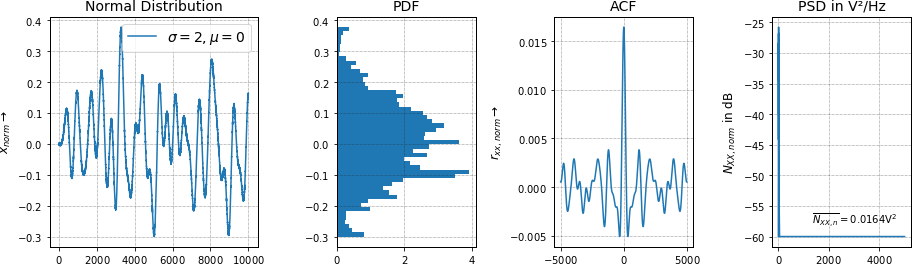

In [9]:
fig4 = plt.figure(4, figsize=(13,4))
gs = gridspec.GridSpec(1, 4, width_ratios=[1.5, 1, 1, 1])
ax4a = plt.subplot(gs[0])
ax4a.set_title('Normal Distribution')
ax4a.plot(n, x_rnd_filt, label = r'$\sigma = {0}, \mu = {1}$'.format(sigma, mu_n))
ax4a.legend(fontsize = 14)
ax4a.set_ylabel(r'$x_{norm}\rightarrow$')
ax4b = plt.subplot(gs[1])
ax4b.set_title('PDF')
ax4b.hist(x_rnd_filt, bins=N_bins, range=None, density=True, 
          align=u'mid', orientation=u'horizontal', label=None)
ax4b.set_ylim(ax4a.get_ylim())
ax4c = plt.subplot(gs[2])
ax4c.set_title('ACF')
acf = sig.correlate(x_rnd_filt, x_rnd_filt, mode='same')/N
ax4c.plot(n-N/2, acf)
ax4c.set_ylabel(r'$r_{xx,norm} \rightarrow$')
ax4d = plt.subplot(gs[3])
ax4d.set_title('PSD in V²/Hz')
f, Nxx_n = sig.periodogram(x_rnd_filt, f_S)
ax4d.plot(f, np.clip(10*log10(Nxx_n), db_bottom, np.inf))
ax4d.annotate(r'$\overline{{N_{{XX,n}}}}={0:.3g}\mathrm{{V}}^2$'.format(np.mean(Nxx_n)*f_S/2), xy=(0.9, 0.1), 
              xycoords='axes fraction', ha='right')
ax4d.set_ylabel(r'$N_{XX, norm}$ in dB')
fig4.tight_layout()
#plt.show()

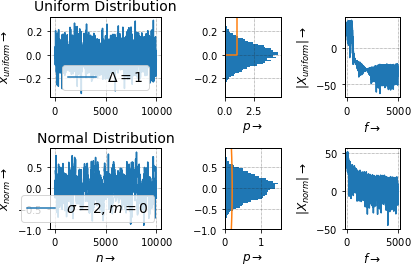

In [10]:
# x_norm, x_uniform, x_binom
b, a = sig.iirfilter(6, [0.1], rs=60, rp=1, btype='lowpass', ftype='ellip') # define filter
x_uniform_filt = sig.lfilter(b, a, x_uniform)
fig2 = plt.figure(2)
gs = gridspec.GridSpec(2, 3, width_ratios=[2, 1, 1]) 
ax11 = plt.subplot(gs[0])
ax11.set_title('Uniform Distribution')
ax11.plot(n, x_uniform_filt, label = r'$\Delta = {0}$'.format(Delta))
ax11.legend(fontsize = 14)
#ax11.grid(True)
ax11.set_ylabel(r'$x_{uniform} \rightarrow$')
ax12 = plt.subplot(gs[1])
ax12.hist(x_uniform_filt, bins=N_bins, range=None, density=True, 
          align=u'mid', orientation=u'horizontal', label=None)
ax12.plot([0, 1/Delta, 1/Delta, 0],[0,0,Delta,Delta])
ax12.set_xlabel(r'$p \rightarrow$')
ax12.set_ylim(ax11.get_ylim())
ax13 = plt.subplot(gs[2])
ax13.plot(20*np.log10(np.abs(np.fft.fft(x_uniform_filt)[:N//2])))
ax13.set_xlabel(r'$f \rightarrow$')
ax13.set_ylabel(r'$|X_{uniform}|\rightarrow$')
#
ax14 = plt.subplot(gs[3])
ax14.set_title('Normal Distribution')
ax14.plot(n, x_norm_filt, label = r'$\sigma = {0}, m = 0$'.format(sigma))
ax14.legend(fontsize = 14)
ax14.set_xlabel(r'$n \rightarrow$');
ax14.set_ylabel(r'$x_{norm}\rightarrow$')
ax15= plt.subplot(gs[4])
#ax14.plot(hist)
ax15.hist(x_norm_filt, bins=N_bins, range=None, density=True, 
          align=u'mid', orientation=u'horizontal', label=None)
ax15.plot(y_sigma, x_sigma)
ax15.set_xlabel(r'$p \rightarrow$')
ax15.set_ylim(ax14.get_ylim())
ax16 = plt.subplot(gs[5])
ax16.plot(20*np.log10(np.abs(np.fft.fft(x_norm_filt)[:N//2])))
ax16.set_xlabel(r'$f \rightarrow$')
ax16.set_ylabel(r'$|X_{norm}|\rightarrow$')
#
fig2.tight_layout()
plt.show()

***
**Copyright**

(c) 2016 - 2018 Prof. Dr. Christian Münker 

This jupyter notebook is part of a collection of notebooks on various topics of Digital Signal Processing. The latest version can be found at https://github.com/chipmuenk/dsp_fpga "Digitale Signalverarbeitung auf FPGAs"

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Christian Münker, Digital Signal Processing auf FPGAs - Vorlesungsunterlagen mit Simulationsbeispielen, 2018*.